# Fabry Perot Interferometer

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl

In [12]:
def eq_12(d, p, c):
    """
    Modified equation 3
    """
    sq_d = p*d + c
    return sq_d

def eq12_fit(f, x, y):
    popt, pcov = curve_fit(f,x,y, bounds=[(-2000,-1000),(2000,1000)],p0=[3,0])
    return popt, pcov


In [13]:
d = [18.28,36.92,50.24,60.14,68.53]
sq_d = np.square(d)
sig_d = np.sqrt((np.ones(5)/d)**2*4)*sq_d

p = np.arange(1,6)

eq12 = eq12_fit(eq_12, p, sq_d)
pcov = eq12[1]
s = float("{:.4g}".format(eq12[0][0]))
ss = float("{:.4g}".format(np.sqrt(np.diag(eq12[1]))[0]))
c = float("{:.4g}".format(eq12[0][1]))
sc = float("{:.4g}".format(np.sqrt(np.diag(eq12[1]))[1]))
print(eq12)

(array([1097.81382009, -786.54488032]), array([[ 103.95707318, -311.87122512],
       [-311.87122512, 1143.5278574 ]]))


<Figure size 432x288 with 0 Axes>

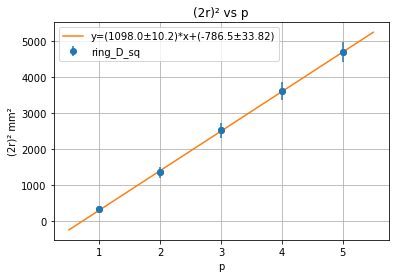

<Figure size 6000x12000 with 0 Axes>

In [15]:
xp = np.linspace(0.5,5.5,1000)
plt.clf()
fig, ax = plt.subplots()
plt.figure(figsize=(5,10), dpi=1200)
ax.set_xlabel("p")
ax.set_ylabel(u"(2r)\u00b2 mm\u00b2")
ax.set_title(u"(2r)\u00b2 vs p")
ax.scatter(p, sq_d)
ax.errorbar(p, sq_d, yerr=sig_d*2, fmt="o", label="ring_D_sq")

fit_label = u"y=({}\u00B1{})*x+({}\u00B1{})".format(s,ss,c,sc)
ax.plot(xp, eq_12(xp, eq12[0][0], eq12[0][1]), label=fit_label)
ax.legend()
ax.grid()
fig.savefig("finesse.png", dpi=500)
